Prever a espécie da flor com base nas medições das pétalas

Dataset: https://www.kaggle.com/datasets/vikrishnan/iris-dataset







The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [ ]:
# importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# importar os dados
iris = pd.read_csv('iris.csv')

# primeiras linhas dos dados
print(iris.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Pré-processamento de dados para aprendizado de máquina:

In [ ]:
# converter 'class' em categorias
iris['class'] = iris['class'].astype('category')

# separar features (variáveis independentes e representam info pras previsões ou classificações) e target (variável dependente e é o que estamos tentando prever ou classificar)
X = iris.drop('class', axis=1)
y = iris['class']

# dividir os dados em conj. de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler transforma feature p melhorar a performance do algoritmo, como colocar std = 1 e calcular a média
# o 'fit' calcula mean e std das features (X_train por ex.) e o 'transform' aplica a transformação padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# treinar o modelo
knn3 = KNeighborsClassifier(n_neighbors=3)  # k = 3
knn3.fit(X_train, y_train)

# previsão
y_pred3 = knn3.predict(X_test)

# assertividade
accuracy = accuracy_score(y_test, y_pred3)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred3))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



um ótimo desempenho, mas vamos verificar um pouco mais com um k diferente e fazendo validação cruzada

In [ ]:
# Treinar kNN com n_neighbors=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

# Fazer previsões
y_pred5 = knn5.predict(X_test)

# Avaliar a assertividade
accuracy5 = accuracy_score(y_test, y_pred5)
print(f'Accuracy com n_neighbors=5: {accuracy5:.2f}')
print(classification_report(y_test, y_pred5))

Accuracy com n_neighbors=5: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



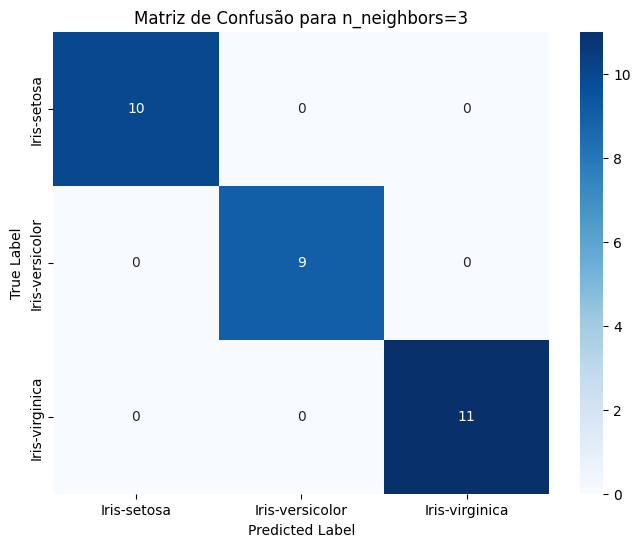

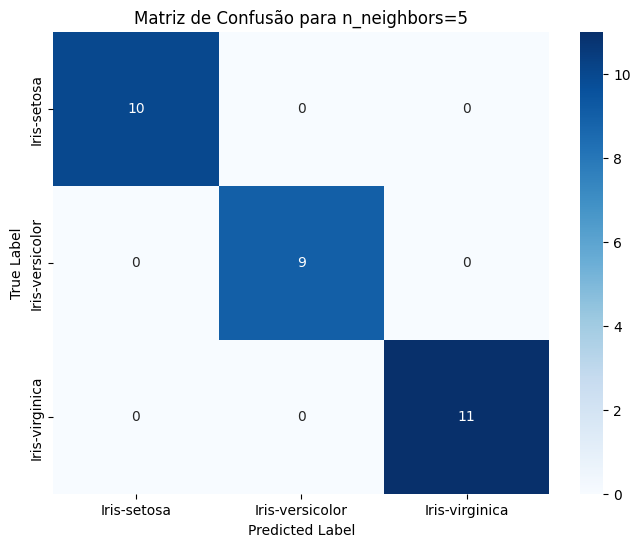

In [ ]:
# plotar a matriz de confusão para n_neighbors=3
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=iris['class'].cat.categories, yticklabels=iris['class'].cat.categories)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão para n_neighbors=3')
plt.show()

# plotar a matriz de confusão para n_neighbors=5
cm5 = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', xticklabels=iris['class'].cat.categories, yticklabels=iris['class'].cat.categories)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matriz de Confusão para n_neighbors=5')
plt.show()


In [ ]:
validacao_x = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(np.mean(validacao_x), np.std(validacao_x))

0.9800000000000001 0.016329931618554516


O modelo kNN tem acurácia de 98% com 1,63%, ou seja, o modelo tem consistência nas previsões, com grande capacidade de classificar as flores e estabilidade nessa validação cruzada (sem overfitting)

In [ ]:
# treinar o modelo - k = 10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)

# previsão
y_pred10 = knn10.predict(X_test)

# assertividade
accuracy = accuracy_score(y_test, y_pred10)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred10))

Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



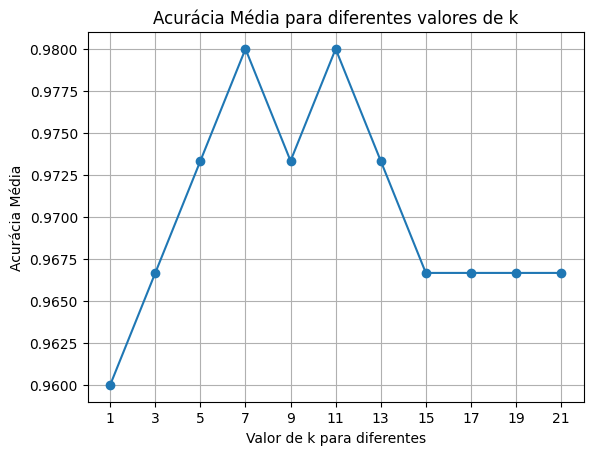

In [ ]:
# testar diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    validacao_x = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(validacao_x))

# plotar
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Valor de k para diferentes')
plt.ylabel('Accuracy -  Média')
plt.title('Accuracy - Média para diferentes valores de k')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
k_values_7_11 = [7, 11]
resultado = {}

# loop pra calcular a accuracy para kd valor de k
for k in k_values_7_11:
    knn = KNeighborsClassifier(n_neighbors=k)
    validacao_x = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    resultado[k] = {
        'mean_accuracy': np.mean(validacao_x),
        'std_accuracy': np.std(validacao_x)
    }
for k in k_values_7_11:
    print(f'k = {k}:')
    print(f'Média - Accuracy: {resultado[k]["mean_accuracy"]:.4f}')
    print(f'Desvio padrão - Accuracy: {resultado[k]["std_accuracy"]:.4f}')

k = 7:
Média - Accuracy: 0.9800
Desvio padrão - Accuracy: 0.0163
k = 11:
Média - Accuracy: 0.9800
Desvio padrão - Accuracy: 0.0267


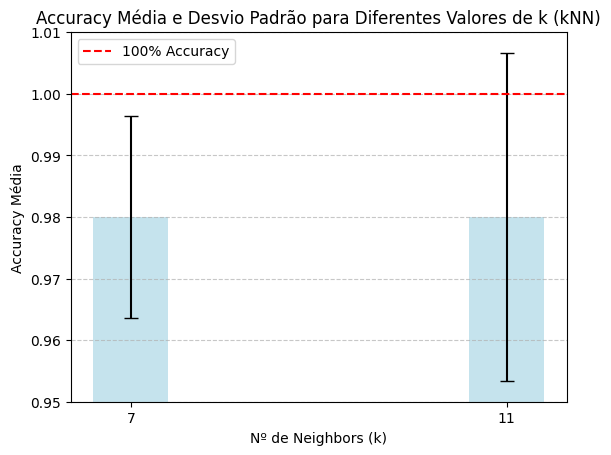

In [ ]:
# media e std
mean_accuracies = [resultado[k]['mean_accuracy'] for k in k_values_7_11]
std_accuracies = [resultado[k]['std_accuracy'] for k in k_values_7_11]

# gráfico de barras
plt.bar(k_values_7_11, mean_accuracies, yerr=std_accuracies, capsize=5, color='lightblue', alpha=0.7)
# add título e rótulo
plt.title('Accuracy Média e Desvio Padrão para Diferentes Valores de k (kNN)')
plt.xlabel('Nº de Neighbors (k)')
plt.ylabel('Accuracy Média')
plt.xticks(k_values_7_11)
# add uma linha horizontal para 100% do Accuracy
plt.axhline(y=1.0, color='r', linestyle='--', label='100% Accuracy')
plt.legend()

# gráfico
plt.ylim(0.95, 1.01)  # ajustando os limites do eixo y p/ melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Barra azul: média

Linha preta: STD

Linha tracejada vermelha: accuracy

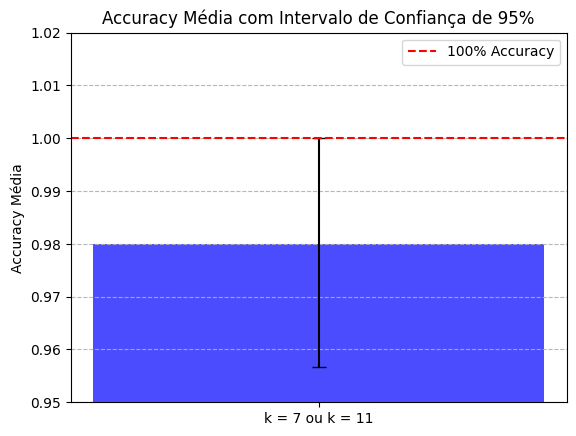

In [ ]:
# dados
mean_accuracy = 0.9800
std_accuracy = 0.0267
n = 5
z_score = 1.96

# calcular erro padrão
standard_error = std_accuracy / (n ** 0.5)

# limites do intervalo de confiança
lower_bound = mean_accuracy - (z_score * standard_error)
upper_bound = mean_accuracy + (z_score * standard_error)

# limite nao ultrapasse 1
upper_bound = min(upper_bound, 1.0)


# dados para o gráfico
k_values = [1]  # Usando apenas um valor de k
mean_values = [mean_accuracy]

# calcular os erros
error_lower = mean_accuracy - lower_bound
error_upper = upper_bound - mean_accuracy
# gráfico de barras
plt.bar(k_values, mean_values,
        yerr=[[error_lower], [error_upper]],  # passando erro inferior e superior corretamente
        capsize=5, color='blue', alpha=0.7)

# adicionar título e rótulos
plt.title('Accuracy Média com Intervalo de Confiança de 95%')
plt.ylabel('Accuracy Média')
plt.xticks(k_values, ['k = 7 ou k = 11'])

# linha horizontal para 100% de acurácia
plt.axhline(y=1.0, color='red', linestyle='--', label='100% Accuracy')
plt.legend()

# gráfico
plt.ylim(0.95, 1.02)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

### **Insight**

Com a média apresentada e STDs '0.0163' e '0.0267', os dois (k = 7 e k = 11 respectivamente) têm um ótimo desempenho, mas o k = 7 ainda pode ser melhor que o k = 11.
